# Simple geometry creation

In [1]:
%matplotlib inline
import math

from dolomites import tiziano
draw = tiziano.drawing()

p1 = draw.add_point(0,-1)
p2 = draw.add_point(0,1)
p3 = draw.add_point(-1,0)
p4 = draw.add_point(1,0)

l1 = draw.add_line(p1,p2,2000)
l2 = draw.add_line(p3,p4,2000)
draw.plot()


ModuleNotFoundError: No module named 'triangle'

We can access points and lines of the drawing (note that a point at line intersections is added):

In [2]:
print(draw.lines)
list=[]
for p in draw.points:
    list.append((p.x,p.y))
list   

NameError: name 'draw' is not defined

We can add also arcs, which are immediatly discretized into lines

In [3]:
draw.add_arc(p1,p3,math.pi/2,10*math.pi/180);
p5 = draw.add_point(-1,-1)
p6 = draw.add_point(1,1)
draw.add_line(p1,p6)
draw.plot()



NameError: name 'draw' is not defined

In [4]:
# save a draw for future use
draw.save('test.tiz')

draw2 = tiziano.drawing()
draw2.load('test.tiz')
draw2.points

NameError: name 'draw' is not defined

we can also remove points and related lines

In [5]:
draw = tiziano.drawing()

# create a grid of points
for x in range(-5,5+1):
    for y in range (-5,5+1):
        draw.add_point(x,y)

p1 = draw.add_point(5,-5)        
p2 = draw.add_point(-5,-5)
draw.add_arc(p1,p2,math.pi,10*math.pi/180.)
p1 = draw.add_point(5,5)        
p2 = draw.add_point(-5,5)
draw.add_arc(p2,p1,math.pi,10*math.pi/180.)
p1 = draw.add_point(0,2)        
p2 = draw.add_point(0,-2)
draw.add_line(p1,p2)

draw.plot()

draw.remove_point(1)           # any point inside the radius
#draw.remove_point(3, mode='>')  # all points outside the radius
#draw.remove_point(p=2,mode='<>',r=3) # all the points within the boundaries
draw.plot()



NameError: name 'tiziano' is not defined

We can also open femm files and import also material labels:

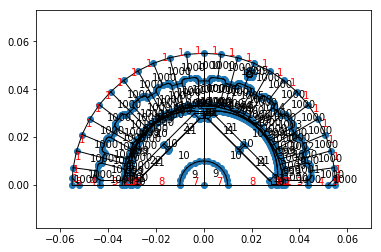

In [8]:
from dolomites import tiziano
import triangle
import numpy
import re
import math

draw = tiziano.drawing()

mm = 1e-3;
D  = 66*mm;  # Stator bore dimaeter
Dsh= 10*mm;  # Shaft diameter
g  = 0.5*mm; # Airgap 
Dr = D-2*g;

draw.open_femm('example.fem');
draw.plot()

<module 'matplotlib.pyplot' from '/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/pyplot.py'>

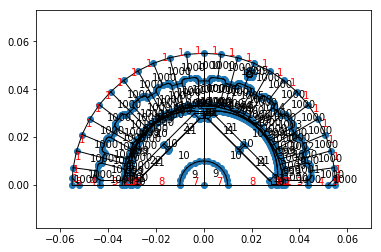

In [6]:
# We can save a coherent version of the draw (for further use within tiziano)
draw.save('example.tiz')

# and we can also export a dxf version of the drawing
draw.save('example.dxf')

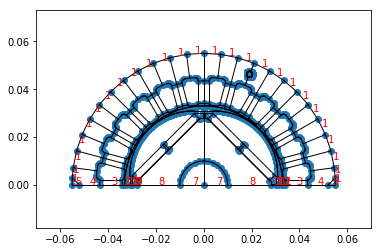

In [9]:
draw2 = tiziano.drawing()
draw2.load('example.tiz')
draw2.plot()

In [15]:
dir(draw2)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'add_arc',
 'add_hole',
 'add_label',
 'add_line',
 'add_point',
 'closest_point',
 'get_holes',
 'get_lines',
 'get_points',
 'get_regions',
 'holes',
 'labels',
 'lines',
 'load',
 'mesh_triangle',
 'open_femm',
 'plot',
 'points',
 'remove_label',
 'remove_point',
 'save',
 'save_mesh',
 'triangle_edges',
 'triangle_points',
 'triangle_triangles']

In [7]:
draw.save_dxf('test.dxf')

<module 'matplotlib.pyplot' from '/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/pyplot.py'>

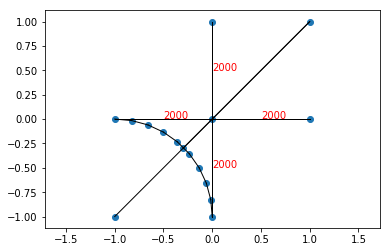

In [5]:
draw.plot()

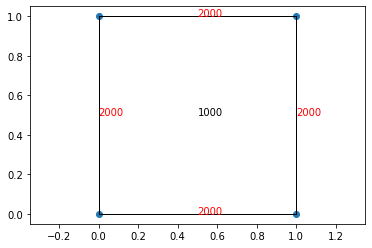

In [11]:
draw = tiziano.drawing()

p1 = draw.add_point(0,1)
p2 = draw.add_point(1,1)
p3 = draw.add_point(1,0)
p4 = draw.add_point(0,0)

l1 = draw.add_line(p1,p2,2000)
l2 = draw.add_line(p2,p3,2000)
l3 = draw.add_line(p3,p4,2000)
l4 = draw.add_line(p4,p1,2000)
draw.add_label(0.5,0.5,1000,0.01)

draw.plot()

In [12]:
# call triangle to mesh the model
draw.mesh_triangle(flags='pqzaeA')

# save the triangle mesh in gmesh format
draw.save_mesh('example_1.msh')

In [13]:
draw.get_regions()

[(0.5, 0.5, 1000.0, 0.01)]

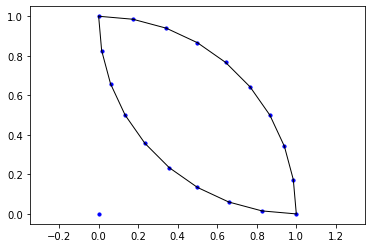

In [6]:
# check if negative angles work properly
import math

from dolomites import tiziano
draw = tiziano.drawing()

p0 = draw.add_point(0,0)
p1 = draw.add_point(0,1)
p2 = draw.add_point(1,0)

draw.add_arc(p1,p2,math.pi/2, 10*math.pi/180);
draw.add_arc(p2,p1,math.pi/2, 10*math.pi/180);

draw.plot()